In [1]:
import vaex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import timedelta
import scipy.stats as st

In [2]:
df = pd.read_parquet("New_York_taxi_21_06_22_08.parquet")

In [4]:
df['year']  = [x.year for x in df['tpep_pickup_datetime']]

In [6]:
df['count'] = 1

In [7]:
df['tpep_pickup_datetime'].max()

Timestamp('2022-09-01 00:04:50')

In [13]:
df = df[(df['tpep_pickup_datetime'] < '2022-08-31 23:59:59') | (df['tpep_pickup_datetime'] > '2021-06-01 00:00:01')]

In [15]:
df['month']  = [x.month for x in df['tpep_pickup_datetime']]

In [17]:
df['day']  = [x.day for x in df['tpep_pickup_datetime']]

In [19]:
df['Hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour

In [21]:
df['Minute'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.minute

### Time Vs Total number of Passenger

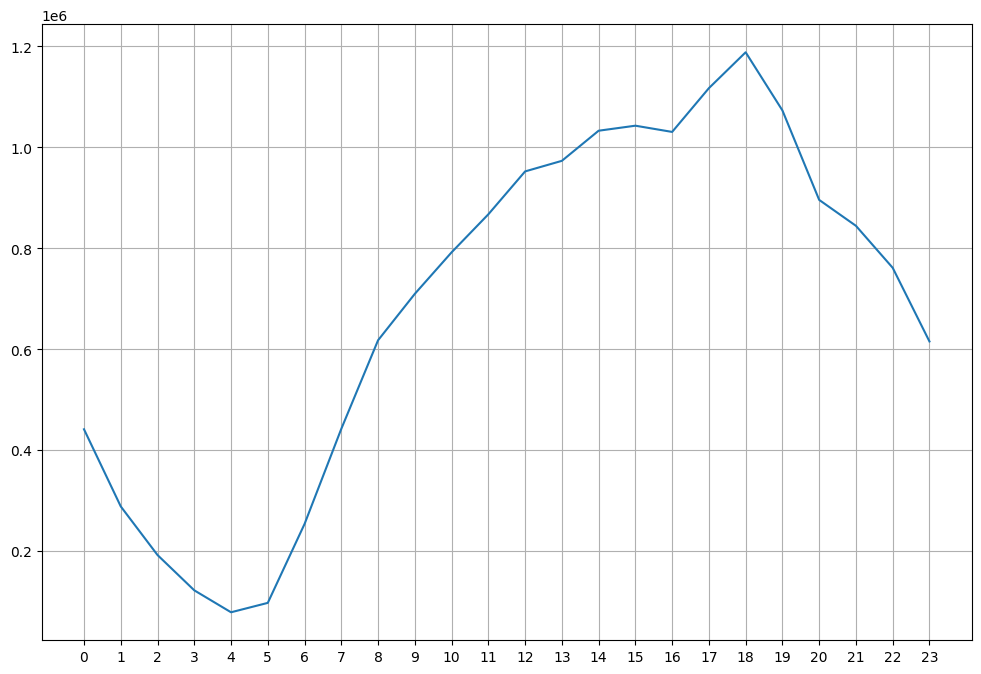

In [26]:
plt.figure(figsize=(12,8))
keys = [pair for pair, x in df.groupby(['Hour'])]
plt.plot(keys, df.groupby(['Hour']).count()['count'])
plt.xticks(keys)
plt.grid()
plt.show()

### Days Vs Total number of Passenger

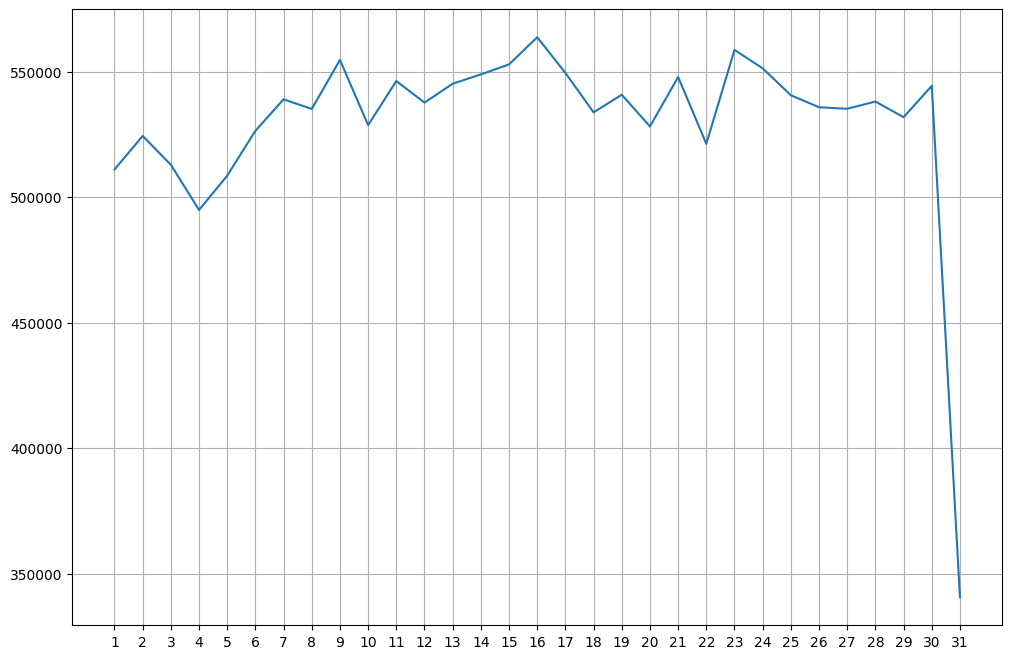

In [25]:
plt.figure(figsize=(12,8))
keys = [pair for pair, x in df.groupby(['day'])]
plt.plot(keys, df.groupby(['day']).count()['count'])
plt.xticks(keys)
plt.grid()
plt.show()

In [31]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,time_taken,speed(miles/hours),store_and_fwd_flag,PUlatitude,PUlongitude,DOlatitude,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,year,count,month,day,Hour,Minute
0,2021-06-01 00:13:26,2021-06-01 00:17:14,1.0,0.90,3.80,14.21,N,36.2624,-86.71371,-28.60636,...,0.3,11.00,2.5,0.0,2021,1,6,1,0,13
2,2021-06-01 00:12:30,2021-06-01 00:16:25,2.0,0.90,3.92,13.78,N,36.2624,-86.71371,-28.60636,...,0.3,11.40,2.5,0.0,2021,1,6,1,0,12
3,2021-06-01 00:35:02,2021-06-01 00:41:52,2.0,1.66,6.83,14.58,N,36.2624,-86.71371,-28.60636,...,0.3,11.30,2.5,0.0,2021,1,6,1,0,35
4,2021-06-01 01:22:44,2021-06-01 01:28:20,1.0,1.90,5.60,20.36,N,36.2624,-86.71371,-28.60636,...,0.3,13.55,2.5,0.0,2021,1,6,1,1,22
5,2021-06-01 03:12:12,2021-06-01 03:15:01,1.0,1.06,2.82,22.55,N,36.2624,-86.71371,-28.60636,...,0.3,10.56,2.5,0.0,2021,1,6,1,3,12


In [34]:
df_2021 = df[(df['tpep_pickup_datetime'] > '2021-06-01 00:00:01') | (df['tpep_pickup_datetime'] < '2021-08-31 23:59:59')]

In [35]:
df_2022 = df[(df['tpep_pickup_datetime'] > '2022-06-01 00:00:01') | (df['tpep_pickup_datetime'] < '2022-08-31 23:59:59')]

In [36]:
df_2021.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,time_taken,speed(miles/hours),store_and_fwd_flag,PUlatitude,PUlongitude,DOlatitude,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,year,count,month,day,Hour,Minute
0,2021-06-01 00:13:26,2021-06-01 00:17:14,1.0,0.90,3.80,14.21,N,36.2624,-86.71371,-28.60636,...,0.3,11.00,2.5,0.0,2021,1,6,1,0,13
2,2021-06-01 00:12:30,2021-06-01 00:16:25,2.0,0.90,3.92,13.78,N,36.2624,-86.71371,-28.60636,...,0.3,11.40,2.5,0.0,2021,1,6,1,0,12
3,2021-06-01 00:35:02,2021-06-01 00:41:52,2.0,1.66,6.83,14.58,N,36.2624,-86.71371,-28.60636,...,0.3,11.30,2.5,0.0,2021,1,6,1,0,35
4,2021-06-01 01:22:44,2021-06-01 01:28:20,1.0,1.90,5.60,20.36,N,36.2624,-86.71371,-28.60636,...,0.3,13.55,2.5,0.0,2021,1,6,1,1,22
5,2021-06-01 03:12:12,2021-06-01 03:15:01,1.0,1.06,2.82,22.55,N,36.2624,-86.71371,-28.60636,...,0.3,10.56,2.5,0.0,2021,1,6,1,3,12


In [ ]:
plt.figure(figsize=(12,8))
keys = [pair for pair, x in df.groupby(['day'])]
keys